#### Project:I combined two projects (Investigating the Medical Appointment Dataset_bikeshare)
**Table of Contents**

Introduction Data Wrangling Exploratory Data Analysis Conclusions

Introduction The medical appointment dataset contains information on over 100k appointments from the country of Brazil. The dataset was originally sourced from Kaggle. It was created to study what factors were useful in predicting if patients would miss thier appointments. It contains basic demographic information on the patients as well as whether or not the patient received SMS notifications. In addition, it indicates if the patient received financial aid.

### Research questions:
Is age indicative of whether a patient will make their appointments? Do SMS notifications coincide with fewer no shows? Do some days of the week have more no shows than others? ‘ScheduledDay’ tells us on what day the patient set up their appointment.

**Neighborhood indicates the location of the hospital.**

**Scholarship indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.**

**No-show’ says ‘No’ if the patient showed up to their appointment, and Yes if they did not show up.**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


###  &make more function to get some information about you are looking for.

### # Introduction 
**In this project, I will analyze Medical Appointment No Shows Dataset and communicate my findings about it using Python libraries NumPy, pandas, Matplotlib, and seaborn. The dataset collects information from 110k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.**

**Get some information from the user about the month and day
        and the age of the user and his neighbor and then we reuse this input
        To be used to get some information about diseases and visualize it
        So the data for the month and day that the user entered
        will appear Some data about diseases that come to the clinic on this day and month**

In [3]:

def get_user_info():

    """ Get some information from the user about the month and day
        and the age of the user and his neighbor and then we reuse this input
        To be used to get some information about diseases and visualize it
        So the data for the month and day that the user entered
        will appear Some data about diseases that come to the clinic on this day and month.
    """
    print('hello! let\'s explore some Some data about diseases that come to the clinic!'.title())
    while True:
        months=["april","may","june"]
        month=input("Enter the month you are looking for to show you the most diseases at this month[april,may,june] \n".title()).lower() 
        if month not in months:
                print("Please provide us with the correct month to analyze the data and avoid entering any month the correct three months\n".title())
        else:
            break
    while True:
        day_of_week=['Saturday','Monday','Tuesday','Wednesday','Thursday','Friday']
        day=input("Enter the day you are looking for to show you the most diseases at this day[all days except sunday] \n".title()).capitalize()
        if day not in day_of_week:
                print("Please provide us with the correct day to analyze the data and avoid entering anthor day \n".title())
        else:
            break
    while True:
        year=int(input("Enter the year you are looking for to show you the most diseases at this year [2016 only]\n".title())) 
        if year != 2016:
                print("Please provide us with the correct year to analyze the data and avoid entering any year except 2016 \n".title())
        else:
            break    
    return month,day,year


In [4]:
def fillter_info(month,day,year):
    """
    Loads data for the specified age and filters by month and day if applicable.
    Args:
        (str) age - age of the user to analyze
        (str) month - show you the most diseases at this month
        (str) day -  the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing age data filtered by month and day
    """
    df=pd.read_csv(r"E:\projects\noshowappointments-kagglev2-may-2016.csv")
    #convert AppointmentDay object to datetime
    df["AppointmentDay"]=pd.to_datetime(df["AppointmentDay"])
    #insert new column to get more fillteration so we create day column
    df["Day_of_week"]=df["AppointmentDay"].dt.day_name()
    #insert new column to get more fillteration so we create month column
    df["Month"]=df["AppointmentDay"].dt.month
    #insert new column to get more fillteration so we create year column
    df["Year"]=df["AppointmentDay"].dt.year

    df=df[df["Day_of_week"]==day.title()]
    months=["april","may","june"]
    month=months.index(month)+4
    df=df[df["Month"]==month]
    df=df[df["Year"]==year]

    return df 

In [5]:
n1,n2,n3=get_user_info()
df=fillter_info(n1,n2,n3)
df.head()

Hello! Let'S Explore Some Some Data About Diseases That Come To The Clinic!
Enter The Month You Are Looking For To Show You The Most Diseases At This Month[April,May,June] 
may
Enter The Day You Are Looking For To Show You The Most Diseases At This Day[All Days Except Sunday] 
monday
Enter The Year You Are Looking For To Show You The Most Diseases At This Year [2016 Only]
2016


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_of_week,Month,Year
3295,3.160000e+12,5644237,M,2016-05-02T08:25:18Z,2016-05-02 00:00:00+00:00,36,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,5,2016
3296,9.750000e+11,5743758,F,2016-05-30T09:23:34Z,2016-05-30 00:00:00+00:00,52,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,5,2016
3297,6.920000e+13,5743435,F,2016-05-30T09:01:04Z,2016-05-30 00:00:00+00:00,2,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,5,2016
3298,5.650000e+13,5743848,F,2016-05-30T09:30:53Z,2016-05-30 00:00:00+00:00,1,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,5,2016
3299,5.590000e+13,5744405,M,2016-05-30T10:13:51Z,2016-05-30 00:00:00+00:00,72,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,5,2016


In [6]:
# Get information about the ndim of the dataframe
df.ndim

2

In [7]:
# Get information about the shape of the dataframe
df.shape


(18023, 17)

In [8]:
# Get information about the size of the dataframe
df.size


306391

#### Step 1: Check the column names to see if we have to rename them:



In [9]:
df.columns


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Day_of_week', 'Month', 'Year'],
      dtype='object')

In [10]:
df.index


Int64Index([ 3295,  3296,  3297,  3298,  3299,  3300,  3301,  3302,  3303,
             3304,
            ...
            84040, 84041, 84042, 84043, 84044, 84045, 84047, 84048, 84049,
            84050],
           dtype='int64', length=18023)

In [11]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Month,Year
count,1.802300e+04,1.802300e+04,18023.000000,18023.000000,18023.000000,18023.000000,18023.000000,18023.000000,18023.000000,18023.0,18023.0
mean,1.481410e+14,5.653789e+06,36.843034,0.097764,0.196471,0.070022,0.031737,0.020807,0.260778,5.0,2016.0
std,2.562484e+14,6.600068e+04,23.301938,0.297003,0.397340,0.255191,0.175305,0.155039,0.439071,0.0,0.0
min,1.420000e+05,5.122866e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,2016.0
25%,4.130000e+12,5.628498e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,2016.0
50%,3.150000e+13,5.662614e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0,2016.0
75%,9.500000e+13,5.698392e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.0,2016.0
max,1.000000e+15,5.748370e+06,115.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.0,2016.0



### Step 2: Get information about the variables in the dataframe and make changes if necessary

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18023 entries, 3295 to 84050
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       18023 non-null  float64            
 1   AppointmentID   18023 non-null  int64              
 2   Gender          18023 non-null  object             
 3   ScheduledDay    18023 non-null  object             
 4   AppointmentDay  18023 non-null  datetime64[ns, UTC]
 5   Age             18023 non-null  int64              
 6   Neighbourhood   18023 non-null  object             
 7   Scholarship     18023 non-null  int64              
 8   Hipertension    18023 non-null  int64              
 9   Diabetes        18023 non-null  int64              
 10  Alcoholism      18023 non-null  int64              
 11  Handcap         18023 non-null  int64              
 12  SMS_received    18023 non-null  int64              
 13  No-show         18023 non-nu

### Data Cleaning
**Drop extraneous columns**
**Step 1: Check the column names to see if we have to rename them:**

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# extract your data that you need and to be more easy when working on it so we delete some columns probably not useful for us 
df.drop(["PatientId","ScheduledDay","AppointmentDay"],axis=1,inplace=True)
df.head()

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_of_week,Month,Year
3295,5644237,M,36,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,5,2016
3296,5743758,F,52,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,5,2016
3297,5743435,F,2,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,5,2016
3298,5743848,F,1,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,5,2016
3299,5744405,M,72,MARIA ORTIZ,0,0,0,0,0,0,No,Monday,5,2016


**let's explore some information about the data frame that have been chosen
How many people visited the clinic that day and how many people have different diseases**

In [14]:
def info_user(df):

    
    """
        let's explore some information about the data frame that have been chosen
        How many people visited the clinic that day and how many people have different diseases
    """
    if "Age" in df :
        age=df["Age"].mean()
        print(f"The Mean of people Age who visited the clinic\n{age}")
        print("-"*50)
    if "Gender" in df :
        gender=df["Gender"].value_counts()
        print(f"The number of people who visited the clinic and are they males or females\n{gender}")
        print("-"*50)
    if "Neighbourhood" in df:
        Neighbourhood=df["Neighbourhood"].mode()[0]
        print(f"the most Neighbourhood this day is\n{Neighbourhood}")  
        print("-"*50)
    if "Hipertension" in df :
        Hipertension=df["Hipertension"].value_counts()
        print(f"The number of people who visited the clinic and how many people have different diseases[0 is not patient 1 is patient]\n{Hipertension}")
        print("-"*50)
    if "Diabetes" in df :
        Diabetes=df["Diabetes"].value_counts()
        print(f"The number of people who visited the clinic and how many people have different diseases[0 is not patient 1 is patient]\n{Diabetes}")
        print("-"*50)
    if "Alcoholism" in df :
        Alcoholism=df["Alcoholism"].value_counts()
        print(f"The number of people who visited the clinic and how many people have different diseases[0 is not patient 1 is patient]\n{Alcoholism}")
        print("-"*50)
    if "Handcap" in df :
        Handcap=df["Handcap"].value_counts()
        print(f"The number of people who visited the clinic and how many people have different diseases[0 is not patient 1 is patient]\n{Handcap}")  
        print("-"*50)
    if "SMS_received" in df :
        SMS_received=df["SMS_received"].value_counts()
        print(f"The number of people who recieved SMS or not at this day[0 is not SMS 1 is SMS]\n{SMS_received}")
        print("-"*50)
    if "AppointmentID" in df :
        AppointmentID=df["AppointmentID"].mode()[0]
        print(f"The number of people ID who visited the clinic\n{AppointmentID}")
        
    
   
    

In [15]:
n5=info_user(df)


The Mean of people Age who visited the clinic
36.84303390112634
--------------------------------------------------
The number of people who visited the clinic and are they males or females
F    11590
M     6433
Name: Gender, dtype: int64
--------------------------------------------------
the most Neighbourhood this day is
ANDORINHAS
--------------------------------------------------
The number of people who visited the clinic and how many people have different diseases[0 is not patient 1 is patient]
0    14482
1     3541
Name: Hipertension, dtype: int64
--------------------------------------------------
The number of people who visited the clinic and how many people have different diseases[0 is not patient 1 is patient]
0    16761
1     1262
Name: Diabetes, dtype: int64
--------------------------------------------------
The number of people who visited the clinic and how many people have different diseases[0 is not patient 1 is patient]
0    17451
1      572
Name: Alcoholism, dtype: in

In [16]:
def matplot_vis(df):

    """
    Let's do some visualization about the data you extracted
    To show you the whole picture in a more clear way
    """
    # visualize your data about Age
    plt.figure(figsize=[9,10])
    plt.hist(df["Age"],label=["Age"],edgecolor="black",color="#875A7B")
    plt.legend()
    plt.title("comparsion regarding Age")
    plt.grid(True)
    plt.style.use("_classic_test_patch")
    # visualize your data about Gender
    plt.figure(figsize=[9,10])
    plt.hist(df["Gender"],label=["Gender"],color="#53338E")
    plt.legend()
    plt.title("comparsion regarding Gender")
    plt.grid(True)
    plt.style.use("_classic_test_patch")
    # visualize your data about SMS_received
    plt.figure(figsize=[10,10])
    plt.hist(df["SMS_received"],label=["SMS_received"],color="red")
    plt.legend()
    plt.title("comparsion regarding SMS_received")
    plt.grid(True)
    plt.style.use("_classic_test_patch")
    # visualize your data about Neighbourhood
    plt.figure(figsize=[10,10])
    x=np.unique(df["Neighbourhood"])
    plt.bar(x,df["Neighbourhood"].value_counts(),label=["Neighbourhood"],color="#53338E",edgecolor="black")
    plt.legend()
    plt.title("comparsion regarding Neighbourhood")
    plt.grid(True)
    plt.style.use("tableau-colorblind10")
    # visualize your data about Hipertension
    plt.figure(figsize=[10,10])
    plt.hist(df["Hipertension"],label=["Hipertension"],color="pink")
    plt.legend()
    plt.title("comparsion regarding Hipertension")
    plt.grid(True)
    plt.style.use("tableau-colorblind10")
    # visualize your data about Diabetes
    plt.figure(figsize=[10,10])
    plt.hist(df["Diabetes"],label=["Diabetes"],color="#CE37C7")
    plt.legend()
    plt.title("comparsion regarding Diabetes")
    plt.grid(True)
    plt.style.use("tableau-colorblind10")
    # visualize your data about Alcoholism
    plt.figure(figsize=[10,10])
    plt.hist(df["Alcoholism"],label=["Alcoholism"],color="#F79500")
    plt.legend()
    plt.title("comparsion regarding Alcoholism")
    plt.grid(True)
    plt.style.use("Solarize_Light2")
    # visualize your data about Handcap
    plt.figure(figsize=[10,10])
    plt.hist(df["Handcap"],label=["Handcap"],color="#310000")
    plt.legend()
    plt.title("comparsion regarding Handcap")
    plt.grid(True)
    plt.style.use("Solarize_Light2")


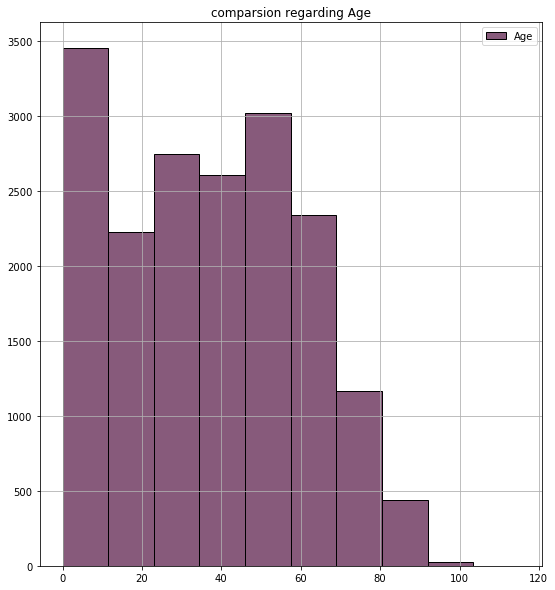

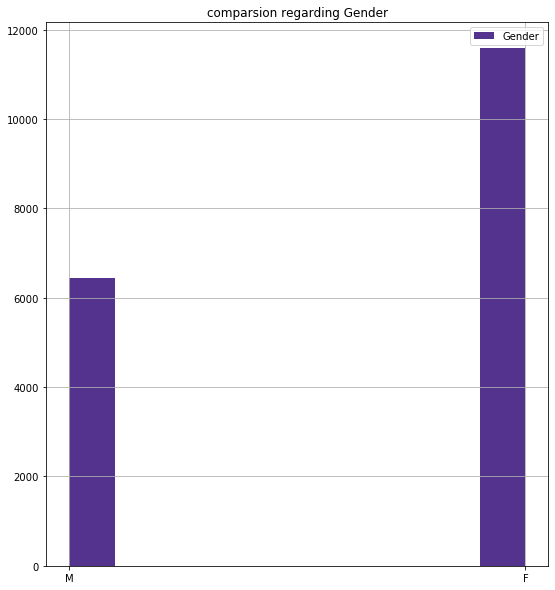

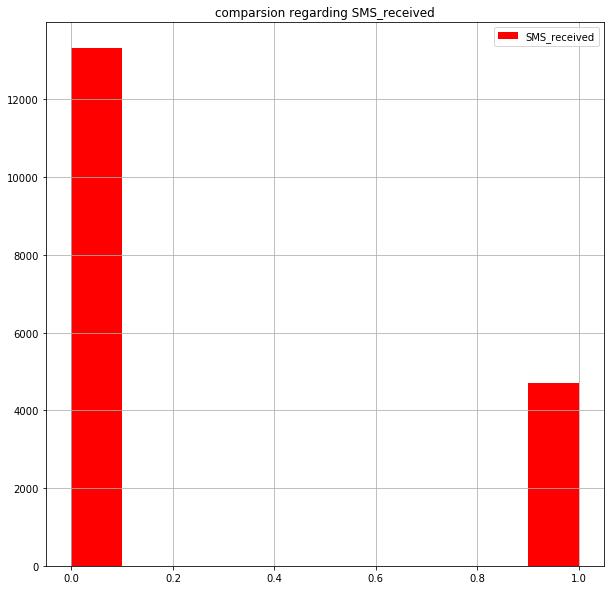

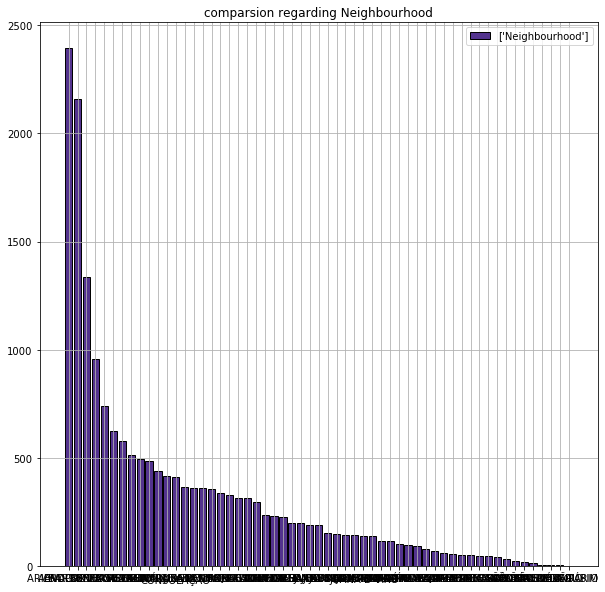

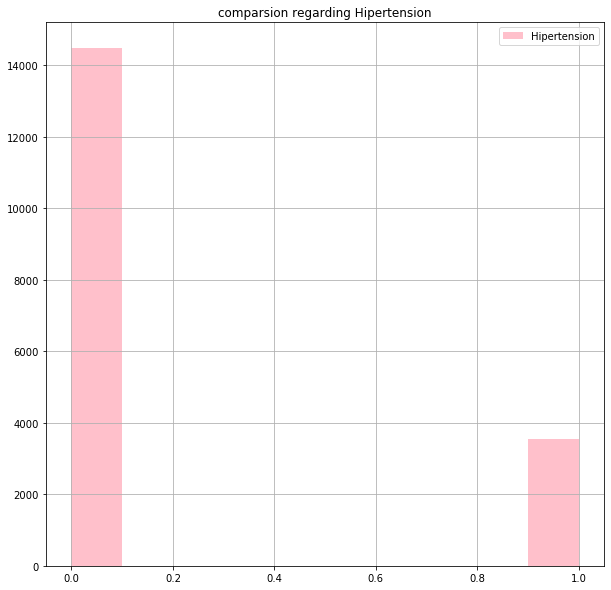

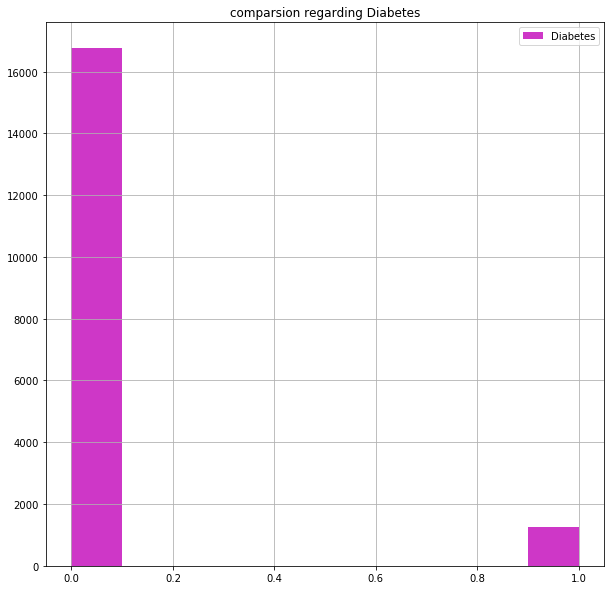

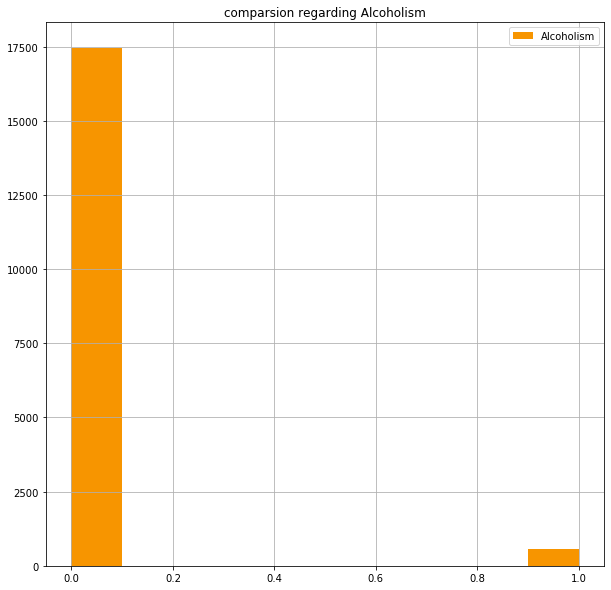

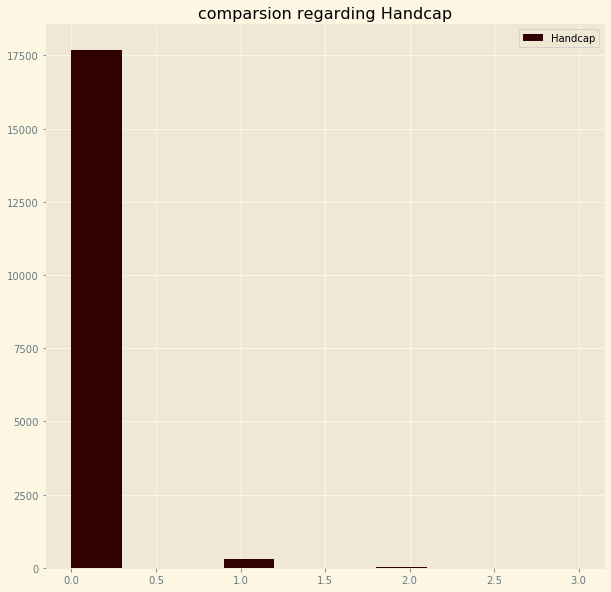

In [17]:
n6=matplot_vis(df)


### Limitations

**The different categories (Columns) Provided in this data set do not provide sufficent information to derive the exact reason behind the behaviour of the patients towards attending or missing the appointment.**

**We observe a anamolous behviour when we study the patients who recieve SMS miss their appointment often. Now we cannot get to the exact**

**Similarly along with the location of neighbouthood of the hospitals if information like rural,Urban area was provided it could have made it more easier to understand**

**Here very selected deseases are mentioned in the data which should have been more elaborated and common disease like flu etc should be menitoned that would have helped us get the deeper insight to understand the trends and patterns welll**

#### Submitting your Project
**Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).**

Alternatively, you can download this report as .html via the File > Download as submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

**Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!**